# **Program to implement Homomorphic Filtering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Applying Homomorphic Filter

Original Image



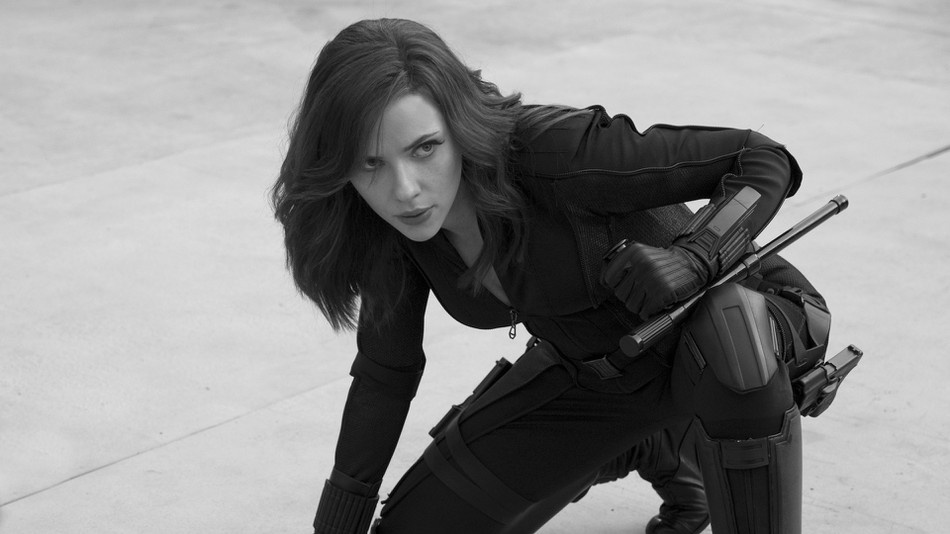


Image after applying Homomorphic filter



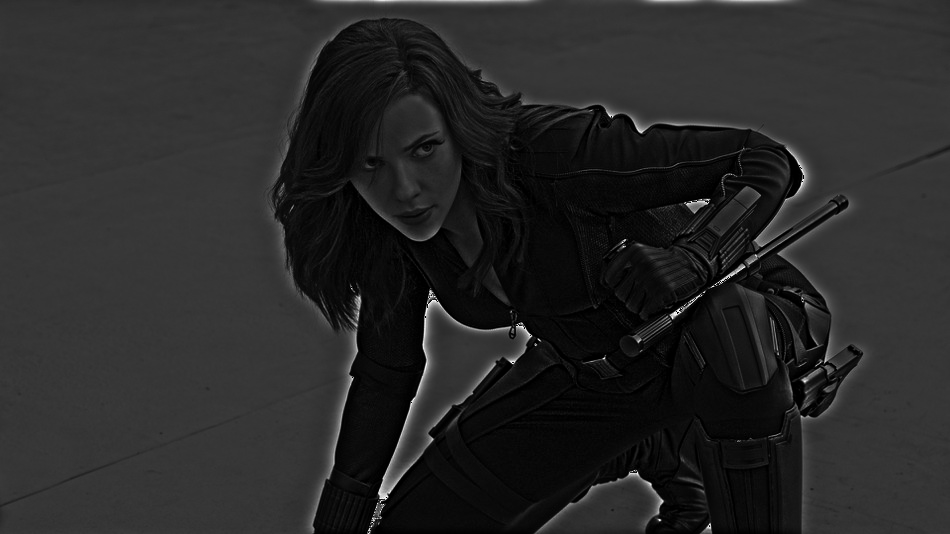

In [ ]:
class HomomorphicFilter:

    def __init__(self, a, b):
        self.a = float(a)
        self.b = float(b)

    def __butterworth_filter(self, I_shape, filter_params):
        P = I_shape[0]/2
        Q = I_shape[1]/2
        U, V = np.meshgrid(range(I_shape[0]), range(I_shape[1]),
                  sparse=False, indexing='ij')
        Duv = (((U-P)**2+(V-Q)**2)).astype(float)
        H = 1/(1+(Duv/filter_params[0]**2)**filter_params[1])
        return (1 - H)

    def __apply_filter(self, I, H):
        H = np.fft.fftshift(H)
        I_filtered = (self.a + self.b*H)*I
        return I_filtered

    def filter(self, I, filter_params, filter='butterworth', H = None):
        I_log = np.log1p(np.array(I, dtype="float"))
        I_fft = np.fft.fft2(I_log) #fft fast fourier transform, fft2 - 2dim
        H = self.__butterworth_filter(I_shape = I_fft.shape, filter_params =
                                      filter_params)
        I_fft_filt = self.__apply_filter(I = I_fft, H = H)
        I_filt = np.fft.ifft2(I_fft_filt) # The inverse two-dimensional FFT.
        I = np.exp(np.real(I_filt))-1
        return np.uint8(I)

print('Applying Homomorphic Filter')
img = cv2.imread('/content/drive/MyDrive/marvel/train/black widow/pic_028.jpg',0)
print('\nOriginal Image\n')
cv2_imshow(img)
print('\nImage after applying Homomorphic filter\n')
homo_filter = HomomorphicFilter(a = 0.75, b = 1.25)
img_filtered = homo_filter.filter(I=img, filter_params=[25,2])
cv2_imshow(img_filtered)
